# Understanding Data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
# Generate sample data
housing=fetch_california_housing()
print(housing.DESCR)
print(housing.feature_names)
print(housing.target)
print(housing.data )


.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [ ]:
type(housing)

# Data Prep

In [4]:
dataset =pd.DataFrame(housing.data,columns=housing.feature_names);
type(dataset)

pandas.core.frame.DataFrame

In [ ]:
dataset.head()
dataset.tail()

In [3]:
dataset['Price']=housing.target
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
dataset.info()

In [ ]:
dataset.describe()

In [ ]:
dataset.isnull().sum()


### EDA

very first thing is to  find correleation coeff(-1 to 1).In short we are picking variables which are not correlateed to each other

In [ ]:
 dataset.corr()

Avg bedrooms and Avg Rooms
Longitude and lattitude


In [ ]:
sns.pairplot(dataset)

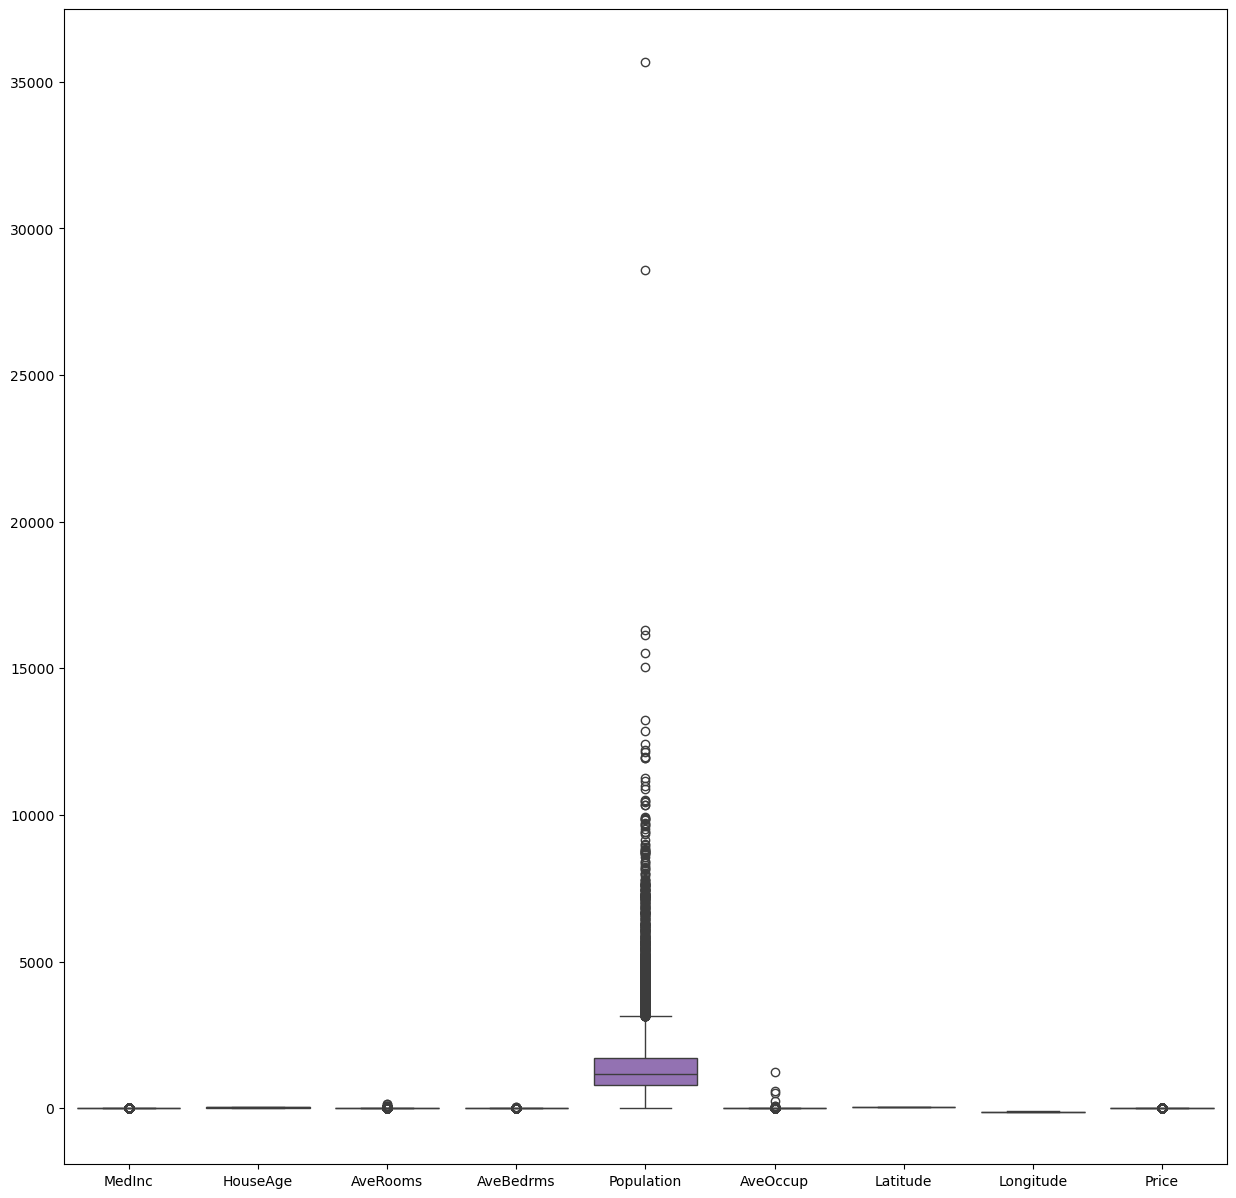

In [6]:
fig,ax=plt.subplots(figsize=(15,15))
sns.boxplot(data=dataset,ax=ax)
plt.savefig('boxplot.jpg')

Split the data into dependent and Independent 
Why we do this

Machine learning models (like linear regression, random forest, etc.) require separate arrays for:

Features (X) → inputs

Target (y) → outputs

This separation is standard before training, splitting datasets, or scaling features

In [5]:
x=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [6]:
##Split the data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_norm=scaler.fit_transform(x_train)
x_test_norm = scaler.transform(x_test)

In [11]:
sns.boxplot(data=x_train_norm,ax=ax);
(plt.savefig("boxPlotTrainData.jpg"))


<Figure size 640x480 with 0 Axes>

In [ ]:
fig,ax=plt.subplots(figsize=(15,15))
sns.boxplot(data=x_test_norm,ax=ax)
plt.savefig('boxplotTestData.jpg')

In [ ]:
## train set -> fit_transform(X_train)
## test set -> transform(X_test)
## why usually this happens?

In [8]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(x_train_norm,y_train)


LinearRegression()

In [9]:
print(regression.coef_ )


[-0.38306674 -0.2062471   0.47933705 -0.27941541 -0.05497227  0.02780921
 -1.91642044]


In [11]:
print(regression.intercept_)

2.0692396089424165


In [10]:
## Model Prediction
reg_pred=regression.predict(x_test_norm)
reg_pred

array([-119.64407164, -119.02365809, -122.15456798, ..., -118.0157511 ,
       -121.36168682, -118.37097406])

In [11]:
residuals=y_test-reg_pred
residuals

20046    0.634072
3024    -0.436342
15663   -0.285432
20484   -0.358654
9814    -1.488514
           ...   
17505   -0.511030
13512    0.768331
10842    0.105751
16559    0.081687
5786     0.130974
Name: Longitude, Length: 6192, dtype: float64

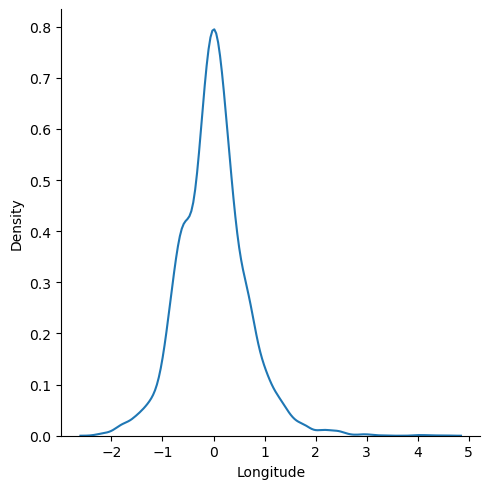

In [12]:
## distribution of plot residuals
sns.displot(residuals,kind='kde')

In [13]:
## Model Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, reg_pred)
mae = mean_absolute_error(y_test, reg_pred)
r2s = r2_score(y_test, reg_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R Squared Score (R²): {r2s:.2f}")


Mean Squared Error (MSE): 0.42
Mean Absolute Error (MAE): 0.48
R Squared Score (R²): 0.89


In [ ]:
# Assuming 'n_features' is the number of features in your model

n = len(y_test)  # Number of observations

r2 = r2_score(y_test, reg_pred)

n_features = x_test_norm.shape[1]

adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - n_features - 1))

print(f"R-squared (R2): {r2:.2f}")

print(f"Adjusted R-squared: {adjusted_r2:.2f}")

In [ ]:
# Assuming 'y_test' is the true target variable and 'reg_pred' is the predicted values

mse = mean_squared_error(y_test, reg_pred)

rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse:.2f}")

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

In [14]:
##Model Save
import pickle
pickle.dump(regression,open('house_price_model.pkl','wb'))


In [15]:
model=pickle.load(open('house_price_model.pkl','rb'))   
model.predict(x_test_norm)

array([-119.64407164, -119.02365809, -122.15456798, ..., -118.0157511 ,
       -121.36168682, -118.37097406])

In [16]:
from sklearn.linear_model import Lasso,Ridge
lasso_regression=Lasso(alpha=0.1)
lasso_regression.fit(x_train_norm,y_train)

ridge_regression=Ridge(alpha=1.0)
ridge_regression.fit(x_train_norm,y_train)


Ridge()

In [17]:
lasso_pred=lasso_regression.predict(x_test_norm)


In [18]:
ridge_pred=ridge_regression.predict(x_test_norm)

In [20]:
print(np.sqrt(mean_squared_error(y_test, lasso_pred)))
print(np.sqrt(mean_squared_error(y_test, ridge_pred)))

0.7087591184828683
0.6514664553983226
